In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.util as sk_util

from skimage.io import imread
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as PSNR
from scipy import signal

np.random.seed(8)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.max(G)

plt.gray()
lena= rgb2gray(imread('../lab_images/lena.tiff'))
frequnoisy = imread('../lab_images/frequnoisy.tif').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Test Image: White Rectangle')

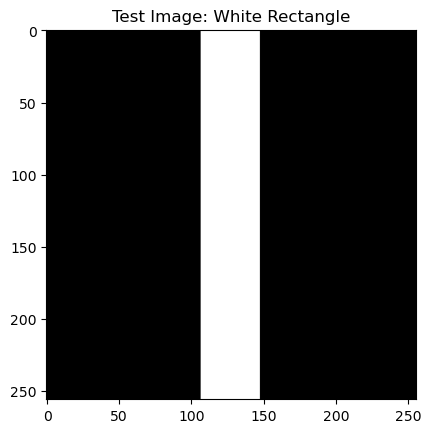

In [2]:
f = np.zeros((256,256))
f[:,107:148] = 1
plt.imshow(f, cmap="gray")
plt.title("Test Image: White Rectangle")

Text(0.5, 1.0, 'FFT Spectra Of Vertical Rectangle')

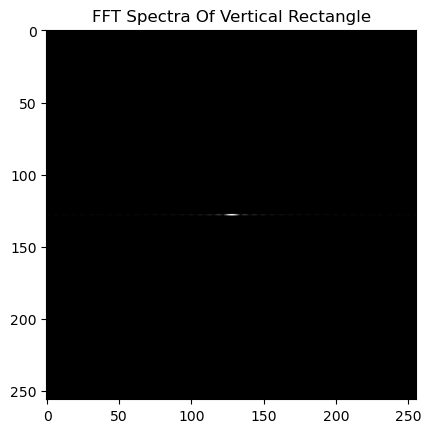

In [3]:
# plot the fourier spectra of the image
f_fft_mag = np.fft.fftshift(np.abs(np.fft.fft2(f)))
plt.imshow(f_fft_mag, cmap="gray")  
plt.title("FFT Spectra Of Vertical Rectangle")

1. What can you say about the general distribution of energy in the Fourier spectra? Why?

In general, most of the energy is in the low frequency components. This is because the low frequency components correspond to coarse features in the image, such as the large rectangle in the image. High frequency components are not so evident in the fournier spectra, as the image lacks fine details (just a coarse rectangle). 


2. What characteristics about the test image can you infer from the Fourier spectra?

I can infer that the image is a simple, coarse image (since the spectra has mainly low frequencies - not much high frequency edge content) which has more horizontal variation (can be seen by the larger horizontal variation in the fourier spectra) than vertical variation (which is true as the rectangle is vertically oriented).

Text(0.5, 1.0, 'Test Image Rotated')

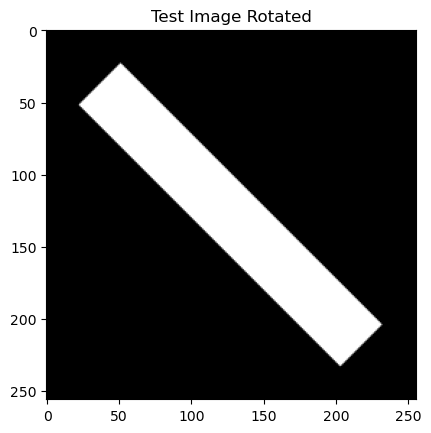

In [4]:
rot_angle_deg = 45
f_rotate = rotate(f, rot_angle_deg)
plt.imshow(f_rotate, cmap="gray")
plt.title("Test Image Rotated")

Text(0.5, 1.0, 'FFT Spectra Of Rotated Rectangle')

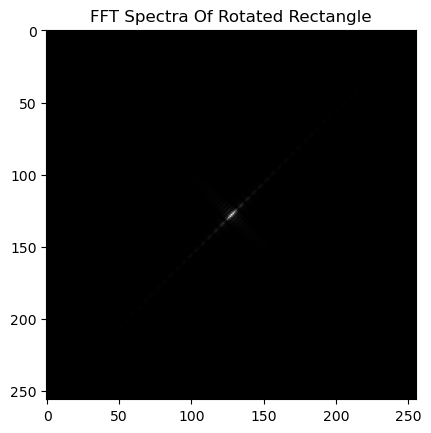

In [5]:
f_rotated_fft_mag = np.fft.fftshift(np.abs(np.fft.fft2(f_rotate)))
plt.imshow(f_rotated_fft_mag, cmap="gray")
plt.title("FFT Spectra Of Rotated Rectangle")

3. How did the Fourier spectra change from the original image (before rotation)?


The fourier spectra was rotated compared to the original image. Notice that originally, the rectangle was vertically oriented, indicating horizontal variation (and thus a horiztonal fourier spectra). In this case, the image was rotated 45 degress CCW, and the fourier spectra was also rotated by 45 degrees CCW. 

4. What conclusions and observations can be made about image characteristics based on the Fourier spectra of both original image and the rotated image?

Both fourier spectra show us that energies are retained in lower frequencies - thus the images contain more coarse detail information and are not detailed. Furthermore, a straight line in the fourier spectra points to a perpendicular line in the image, as edges are perpendicular to the variation in pixel intensities. Thus, the line pointing from bottom left to top right <=> rectangle is oriented top left <=> bottom right. The same hold for the original image, where horizontal fourier spectra <=> vertical rectangle.

In [6]:
# compute amplitude and phase of lena img
lena_fft = np.fft.fft2(lena)

lena_amp = np.abs(lena_fft)
lena_amp_reconstruct = np.fft.ifftshift(np.fft.ifft2(lena_amp))

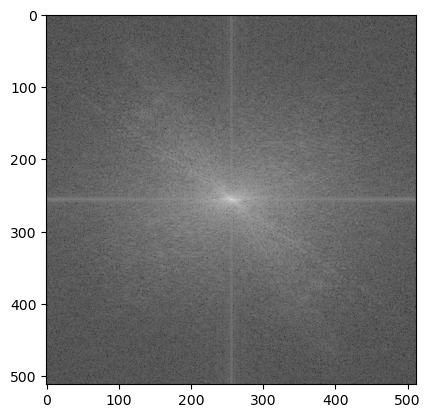

In [7]:
plt.imshow(np.log(np.fft.fftshift(lena_amp)), cmap="gray")

In [8]:
lena_phase = lena_fft / lena_amp
lena_phase_reconstruct = np.fft.ifft2(lena_phase)

Text(0.5, 1.0, 'Lena image')

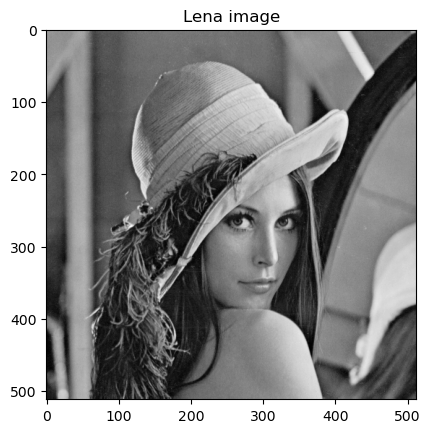

In [9]:
plt.imshow(lena, cmap="gray")
plt.title("Lena image")

Text(0.5, 1.0, 'Lena Reconstructed Using Amplitude')

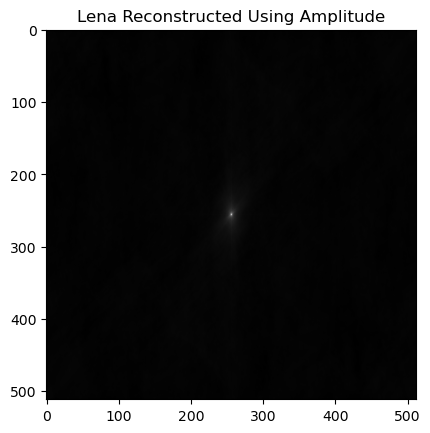

In [10]:
plt.imshow(lena_amp_reconstruct.real, cmap="gray")
plt.title("Lena Reconstructed Using Amplitude")

Text(0.5, 1.0, 'Log Lena Reconstructed using Amplitude Component')

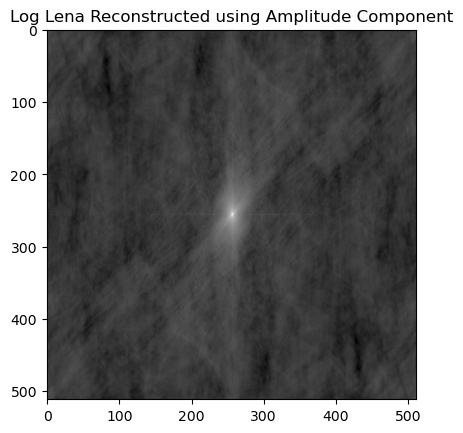

In [11]:
plt.imshow(np.log(lena_amp_reconstruct.real))
plt.title("Log Lena Reconstructed using Amplitude Component")

Text(0.5, 1.0, 'Lena Reconstructed Using Phase Component')

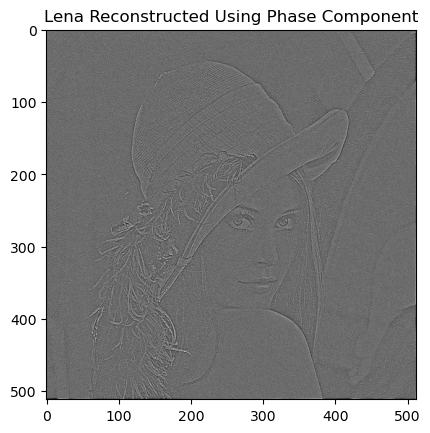

In [12]:
plt.imshow(lena_phase_reconstruct.real, cmap="gray")
plt.title("Lena Reconstructed Using Phase Component")

5. Describe how the reconstructed image from the amplitude component look like? What image characteristics does the amplitude component capture? (Hint: apply np.log to the result of the inverse fft).

The reconstructed image from the amplitude component just looks like a white dot in the middle, and in log scale, it is just a white dot with noise around it (both very low detail - highly distorted). The amplitude is capturing the intensity of different frequency components, but not any of the spatial details. As a result, we expect somewhat similar contrast in the reconstruction (since it deals with signal intensities),which to some extent can be seen by the log version. 


6. Describe how the reconstructed image from the phase component look like? What image characteristics does the phase component capture?

The reconstructed image from phase looks like a lighter version of lena - the contrast is incorrect, but the general spatial information has been restored. The phase component is able to capture offsets of sinusoidal frequencies, which come together to create spatial representations. As a result, the phase reconstruction can use the spatial information to roughly re-construct the image, however with the incorrect contrast (as the phase components do not deal with intensity). 



## 3.  Noise Reduction in the Frequency Domain

In [13]:
lena.min(), lena.max()

(0.07254666666666668, 0.9654356862745097)

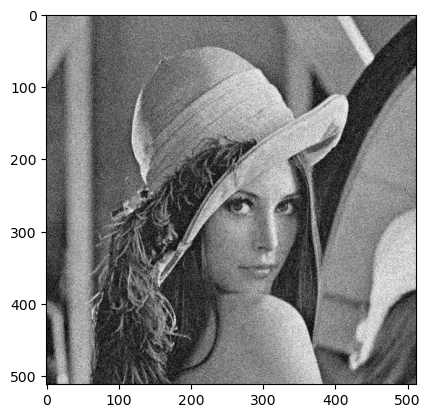

In [14]:
# apply additive gaussian noise to lena
lena_noise = sk_util.random_noise(lena, mode="gaussian", var=0.005)
plt.imshow(lena_noise)

Text(0.5, 1.0, 'Log Fourier Spectra Of Lena Image')

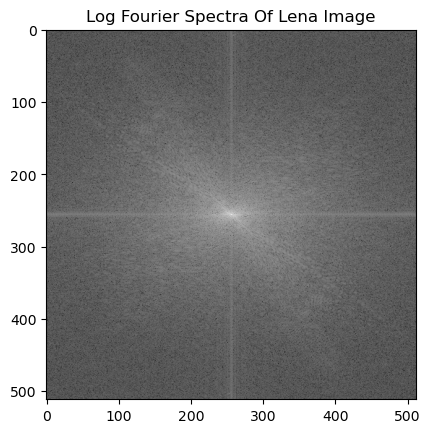

In [15]:
lena_fft_2 = np.fft.fft2(lena)
lena_fft_plotting = np.fft.fftshift(np.log(np.abs(lena_fft_2)))
plt.imshow(lena_fft_plotting)
plt.title("Log Fourier Spectra Of Lena Image")

Text(0.5, 1.0, 'Log Fourier Spectra Of Lena With Gaussian Noise')

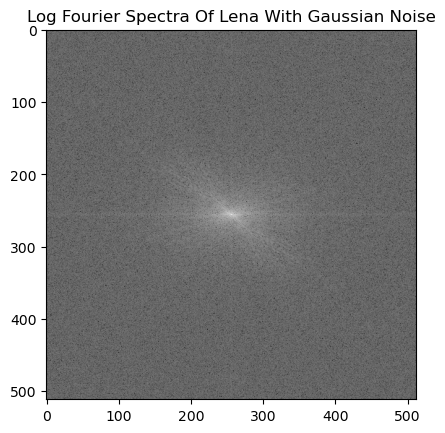

In [16]:
lena_noise_fft = np.fft.fft2(lena_noise)
lena_noise_fft_plotting = np.fft.fftshift(np.log(np.abs(lena_noise_fft)))
plt.imshow(lena_noise_fft_plotting)
plt.title("Log Fourier Spectra Of Lena With Gaussian Noise")

In [17]:
lena_noise_fft_plotting.min(), lena_noise_fft_plotting.max()

(-2.1437470218129686, 11.695662077636989)

7. Compare the two Fourier spectra. What are the differences? Where are these differences most visually prominent? Why?

The fourier spectra have the same general information, especially in the lower frequencies but gets much more 'blurred' in the high frequencies. Thus, in general the differences are most noticeable in higher logged frequencies, where the image with noise shows more higher frequencies, while the image without noise does not show this. It makes sense since the additive gaussian noise introduces some points which are quite different than the originals, thus leading to large frequency changes and high frequency content being present (high frequency noise). The spectra, as explained, shows the effect of adding the high frequency noise.

In [18]:
from skimage.morphology import disk
r = 60
h = disk(r)
h_freq = np.zeros(lena.shape)
h_freq[lena.shape[0]//2-r: lena.shape[0]//2+r+1, lena.shape[1]//2-r: lena.shape[1]//2+r+1] = h

Text(0.5, 1.0, 'Fourier Spectra of Ideal LFP')

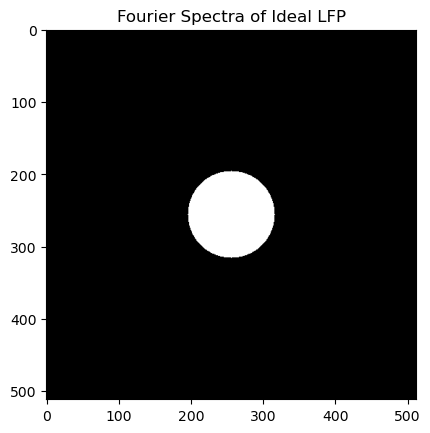

In [19]:
# create and plot fourier spectra for h_freq
# note that we are already in freq domain, so just plot it
plt.imshow(np.abs(h_freq), cmap="gray")
plt.title("Fourier Spectra of Ideal LFP")

Text(0.5, 1.0, 'Lena Image Filtered Using Ideal LFP in Freq Domain')

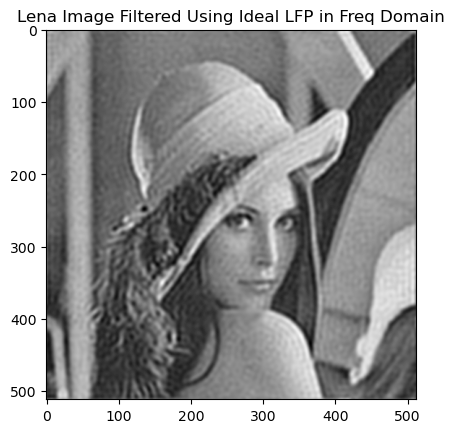

In [20]:
denoised_lena_freq = np.fft.fftshift(lena_noise_fft) * h_freq
denoised_lena = np.fft.ifft2(np.fft.ifftshift(denoised_lena_freq))
plt.imshow(denoised_lena.real)
plt.title("Lena Image Filtered Using Ideal LFP in Freq Domain")

In [21]:
print(f"The PSNR between Original Lena and denoised Lena is: {PSNR(denoised_lena.real, lena)}")

The PSNR between Original Lena and denoised Lena is: 27.462615552798425


8. Describe the appearance of the denoised image compared to the original and the noisy images. Why does it look this way? What does the ideal low-pass filter do?

The denoised image looks more blurry, and 'ringy' compared to both the original and noisy image. It looks more blurry because we applied a low pass filter which attenuated some of the high frequency content, thus removing some edges while also removing the high frequency gaussian noise. It looks 'ringy' because the ideal low-pass filter has an abrupt jump in it's cutoff value; when converted into the spatial domain this leads to a 'ringy' effect (evident in the image). Thus, the ideal LPF attenuates high frequency noise while adding a ringing artifact to the image. 

9. There is a particular artifact present in the restored image. What is it and why does it happen?

Yes - as stated before, ringing is present. Ringing is an effect where edges are distorted (the 'flat' part of the edge osciallates slightly before and after). It can be derived from the step response of the ideal filter, where the sharp change in the ideal LPF leads has a time equivalent of a sinc function. Taking the edge response, we can see slight osciallations before and after the edge in the edge response, as a result of the sharp 'edge' (abrupt change) in the LPF. 

Text(0.5, 1.0, 'Fourier Spectra of Ideal LFP with r=20')

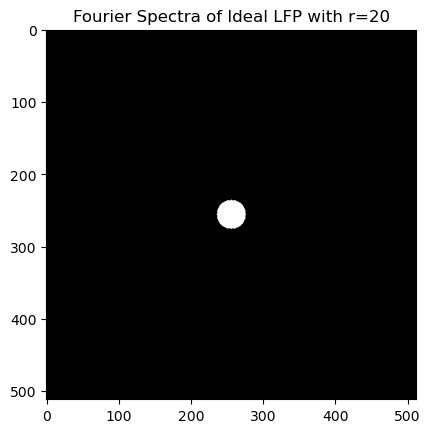

In [22]:
'''
Now create a low-pass filter with a cut-off radius of 20 and apply it to the noisy image in the frequency
domain and then perform an inverse Fourier transform. Plot the resulting denoised image and the corre-
sponding PSNR
'''

r_2 = 20
h_2 = disk(r_2)
h_freq_2 = np.zeros(lena.shape)
h_freq_2[lena.shape[0]//2-r_2: lena.shape[0]//2+r_2+1, lena.shape[1]//2-r_2: lena.shape[1]//2+r_2+1] = h_2
plt.imshow(np.abs(h_freq_2), cmap="gray")
plt.title("Fourier Spectra of Ideal LFP with r=20")

Text(0.5, 1.0, 'Lena Image Filtered Using Ideal LFP in Freq Domain with Smaller Radius')

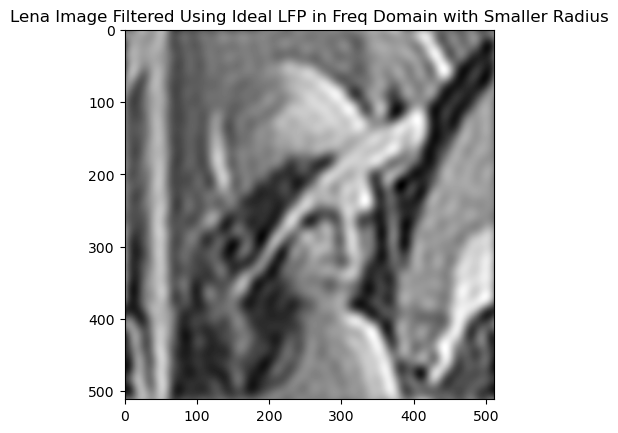

In [23]:
denoised_lena_freq_2 = np.fft.fftshift(lena_noise_fft) * h_freq_2
denoised_lena_2 = np.fft.ifft2(np.fft.ifftshift(denoised_lena_freq_2))
plt.imshow(denoised_lena_2.real)
plt.title("Lena Image Filtered Using Ideal LFP in Freq Domain with Smaller Radius")

In [24]:
print(f"The PSNR between Original Lena and second denoised Lena is: {PSNR(denoised_lena_2.real, lena)}")

The PSNR between Original Lena and second denoised Lena is: 22.50844946832375


10. Compare the denoised image with the denoised image using a cut-off radius of 60. How does the image and the PSNR differ? Why?

The denoised image with a cut-off radius of 20 is much more blurry than the image with a cutoff radius of 60. Furthermore, the PSNR has decreased for the radius 20 image which is more blurry. Furthermore, the ringing effects have been amplified. The denoised image with the lower cut-off frequency is attenuating more medium to high frequencies, removing lots edges and detail (higher frequency details). The cutoff of 60 still keeps frequencies between 20-60 (compared to the 20 cutoff filter) which provide higher frequency details, such as edges, so that lena retains details. Futhermore, the ringing is amplified with the 20 cutoff radius as the narrower filter in frequency domain points to a wider, most oscillatory filter in time domain, and thus more ringing. 

11. What conclusions can you draw about the relationship between cut-off radius and resulting image after filtering? What is the trade-off in terms of noise reduction?

The general relationship is the smaller the cut-off radius, the more high frequency CONTENT is removed after filtering. The word content has been highlighted as it gets rid of both high frequency noise, but also high frequency edges in the image with provide detial. Thus, we toss away both noise and high frequnecy edges which make the image crisp. The trade-off in terms of noise reduction is that the more noise we remove, the more high frequency signal we also remove, thus we end up with a blurry image which is missing fine details. We want to attenuate the noise as much as possible, while perserving the desired high frequency content. 

In [25]:
# create a gaussian low pass filter kernel w std = 60
# normalize it based on the highest value in the kernel
gaussian = gaussian_filter(lena.shape[0], lena.shape[1], 60)
gaussian.min(), gaussian.max()

(1.3328871922137005e-08, 1.0)

Text(0.5, 1.0, 'Fourier Spectra Gaussian With Sigma = 60|')

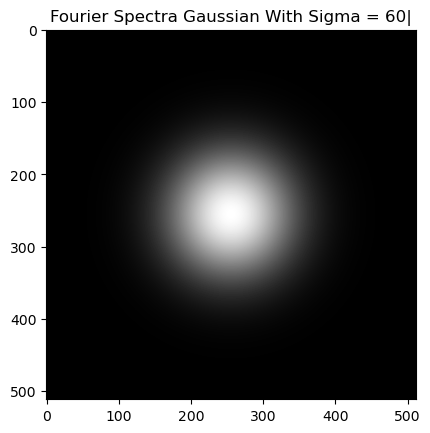

In [26]:
plt.imshow(gaussian, cmap="gray")
plt.title("Fourier Spectra Gaussian With Sigma = 60|")

Text(0.5, 1.0, 'Lena Image Filtered Using Gaussian Filter With Sigma = 60')

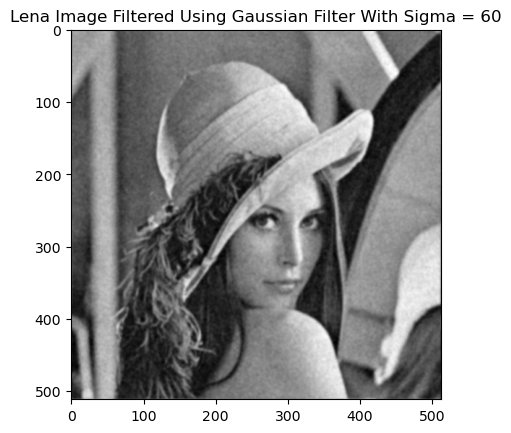

In [27]:
denoised_lena_freq_3 = np.fft.fftshift(lena_noise_fft) * gaussian
denoised_lena_3 = np.fft.ifft2(np.fft.ifftshift(denoised_lena_freq_3))
plt.imshow(denoised_lena_3.real)
plt.title("Lena Image Filtered Using Gaussian Filter With Sigma = 60")

In [28]:
print(f"The PSNR between Original Lena and third denoised Lena is: {PSNR(denoised_lena_3.real, lena)}")

The PSNR between Original Lena and third denoised Lena is: 29.222983670656077


12. Compare the denoised image with the denoised images produced using the ideal low-pass filters. How does the image and the PSNR differ? Is it better or worse? Why Does it have the same type of image artifacts?

The lena image produced using the gaussian for filtering in frequency domain is better than both ideal LPFs. The image of lena is quite clear, with high frequency signal generally preserved, and the additive gaussian noise attenuated. Furthermore, the PSNR has increased for the gaussian filter, highlighting it's superior performance. One major difference that makes the gaussian denoised image more visually appealing is the lack of rining - it does not have any ringing. The reason for this is that the gaussian in the frequency domain does not have any sharp edges; it smoothly transitions. Thus, in the time domain, the gaussian is also... a gaussian. As a result, the step response is smooth and experience no oscillations, thus the resulting image has no ringing effect present. Thus, the gaussian filter is evidently a better low pass filter in the frequency domain than the ideal LPF as a result of no ringing leading to an image with more sharply defined edges after filtering.

Text(0.5, 1.0, 'Noisy image in the frequency domain')

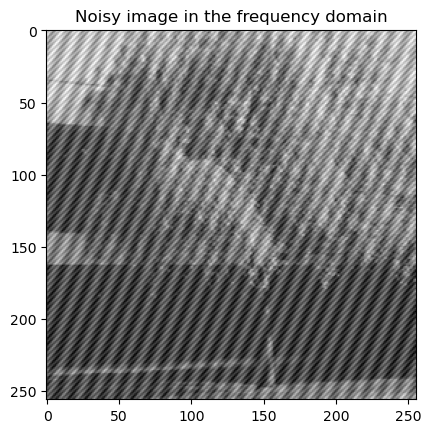

In [29]:
'''
Examine the image frequnoisy.tif and its Fourier spectrum. Note the peaks in the spectrum corresponding to
the periodic noise source, which has been added to the original image. Design and implement a frequency
domain filter which filters out this noise. Justify your design
'''
plt.imshow(frequnoisy, cmap="gray")
plt.title("Noisy image in the frequency domain")

Text(0.5, 1.0, 'Noisy Frequency Image Fourier Spectra')

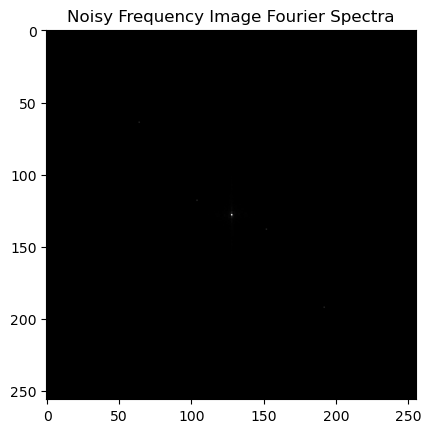

In [30]:
# plot the fourier spectra of the image
freq_noisy_fft = np.fft.fft2(frequnoisy)
freq_noisy_spectra = np.abs(freq_noisy_fft)

plt.imshow(np.fft.fftshift(freq_noisy_spectra))
plt.title("Noisy Frequency Image Fourier Spectra")

Text(0.5, 1.0, 'Noisy Frequency Image Fourier Spectra Logged')

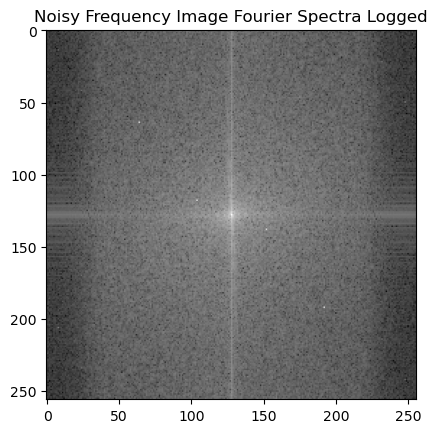

In [31]:
plt.imshow(np.fft.fftshift(np.log(freq_noisy_spectra)))
plt.title("Noisy Frequency Image Fourier Spectra Logged")

In [32]:
# the logged version of the fourier spectra brings out 2 pairs of impulses in the fourier spectra

# the first pair is at about (100, 120) and (150, 140)
# the second pair is at about (60, 60) and (190, 190)

# third pair (5, 210) and (250, 55)
# final pair (5, 5) and (250, 245)

# final super small notches (120, 128), (130, 128)

# we note that the logged fourier spectra shows that around these points, there is frequnecy content. Thus to we choose to not use a band reject filter, and rather
# want to use a notch reject filter:
# 1. Use a note reject filter to get rid of the 4 hotspots
# we can use gaussian fitlers in the neighbourhoods with small sigma values in freq domain to approx the notches - and avoid any ringing effects

Text(0.5, 1.0, 'Centralized Gaussian Notch Filter')

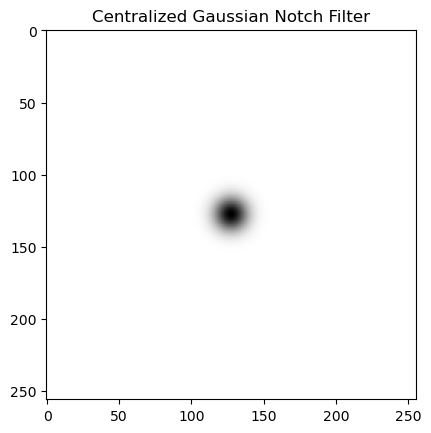

In [33]:
notch_central_remove = 1 - gaussian_filter(frequnoisy.shape[0], frequnoisy.shape[1], 8)
plt.imshow(notch_central_remove, cmap="gray")
plt.title("Centralized Gaussian Notch Filter")


Updated detected peak coordinates:
Coordinate: (192, 192)
Coordinate: (64, 64)
Coordinate: (152, 138)
Coordinate: (104, 118)


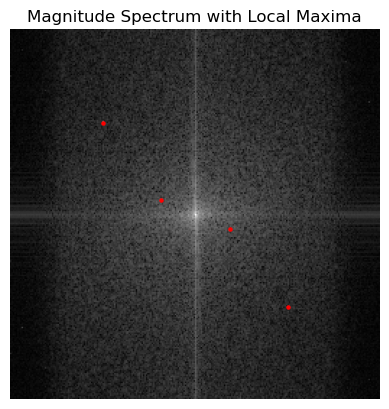

In [34]:
from skimage.feature import peak_local_max

# Find local maxima
coordinates = peak_local_max(np.fft.fftshift(freq_noisy_spectra), min_distance=10, threshold_abs=100)

# Remove the coordinate (128, 128) --> DC gain, don't want to remove that 'peak'
coordinates = coordinates[~np.all(coordinates == [128, 128], axis=1)]
coordinates = np.flip(coordinates)

# Print updated coordinates
print("\nUpdated detected peak coordinates:")
for coord in coordinates:
    print(f"Coordinate: ({coord[0]}, {coord[1]})")

# Plot the magnitude spectrum and mark the local maxima
plt.imshow(np.log(np.fft.fftshift(freq_noisy_spectra) + 1), cmap='gray')  # Log scale for visibility
plt.title('Magnitude Spectrum with Local Maxima')
plt.axis('off')
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red', s=5)  # Scatter plot of maxima
plt.show()

In [36]:
def create_notch_from_pt(x, y, std = 4, show_plt = False):
    notch_central = 1 - gaussian_filter(frequnoisy.shape[0], frequnoisy.shape[1], std)
    mid_x, mid_y = notch_central.shape[0] // 2, notch_central.shape[1] // 2
    shift_x = x - mid_x  # positive value shifts right, negative shifts left
    shift_y = y - mid_y  # positive value shifts down, negative shifts up

    # Perform the shift using np.roll
    shifted_notch = np.roll(notch_central, shift=(shift_y, shift_x), axis=(0, 1))
    if show_plt:
        plt.imshow(shifted_notch)
    return shifted_notch

[192 192]
[64 64]
[152 138]
[104 118]


Text(0.5, 1.0, 'Notch Filter')

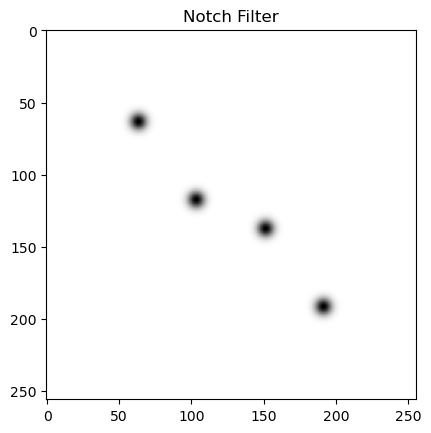

In [37]:
notch_filter = None
for coordinate in coordinates:
    print(coordinate)
    notch = create_notch_from_pt(*coordinate)
    if notch_filter is None:
        notch_filter = notch
    else:
        notch_filter *= notch

plt.imshow(notch_filter)
plt.title("Notch Filter")

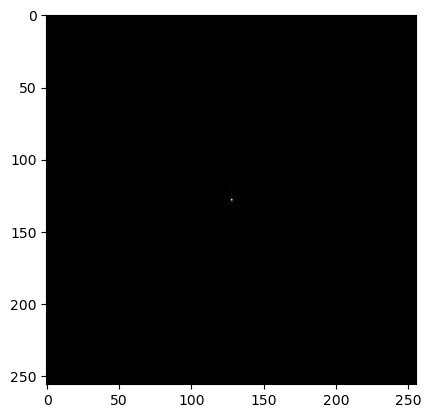

In [46]:
# apply the notches
noisy_freq_removed_freq_domain = np.fft.fftshift(freq_noisy_fft) * notch_filter
plt.imshow(np.abs(noisy_freq_removed_freq_domain), cmap="gray")

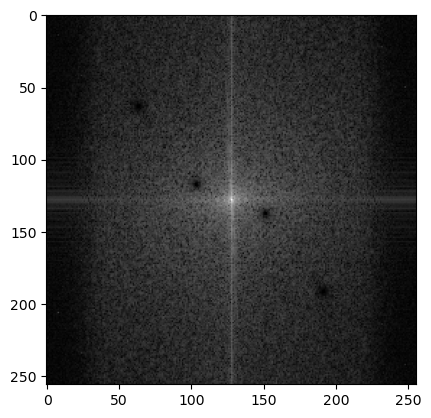

In [49]:
plt.imshow(np.log(np.abs(noisy_freq_removed_freq_domain) + 1), cmap="gray")

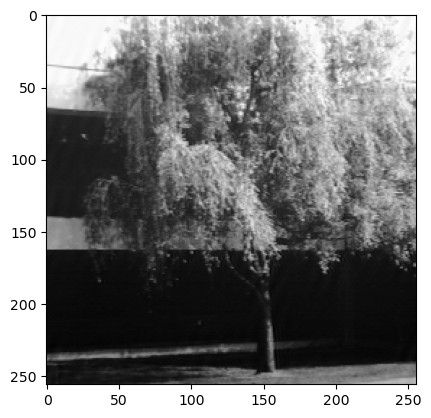

In [48]:
denoised_noisy_image = np.fft.ifft2(np.fft.ifftshift(noisy_freq_removed_freq_domain))
plt.imshow(denoised_noisy_image.real)